In [23]:
# Importing required libraies
import numpy as np
import struct
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import cv2
import os, sys
import matplotlib.pyplot as plt

In [24]:
# Method to load image data 
def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic_num, num_imgs, rows, cols = struct.unpack('>IIII', f.read(16))             
        images = np.frombuffer(f.read(),dtype=np.uint8).reshape(num_imgs, rows, cols)
    return images

In [25]:
# Method to load image labels 
def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic_num, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [ ]:
# Splitting train, test images and labels 
x_train = load_images(r"C:\Users\manju\OneDrive\Desktop\DataScience_Projects\Digit_Recognition\train\train-images-idx3-ubyte")
x_test = load_images(r"C:\Users\manju\OneDrive\Desktop\DataScience_Projects\Digit_Recognition\test\t10k-images-idx3-ubyte")
y_train = load_labels(r"C:\Users\manju\OneDrive\Desktop\DataScience_Projects\Digit_Recognition\train\train-labels-idx1-ubyte")
y_test = load_labels(r"C:\Users\manju\OneDrive\Desktop\DataScience_Projects\Digit_Recognition\test\t10k-labels-idx1-ubyte")

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [28]:
# Process Data

# Pixel normalization
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0             
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
# Build the CNN model
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy {test_accuracy}")

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7685 - loss: 0.7097 - val_accuracy: 0.9793 - val_loss: 0.0703
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9650 - loss: 0.1178 - val_accuracy: 0.9855 - val_loss: 0.0500
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9742 - loss: 0.0864 - val_accuracy: 0.9883 - val_loss: 0.0403
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9788 - loss: 0.0701 - val_accuracy: 0.9890 - val_loss: 0.0352
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9834 - loss: 0.0551 - val_accuracy: 0.9913 - val_loss: 0.0322
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9861 - loss: 0.0391
Test accuracy 0.9897000193595886


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
digit is 3


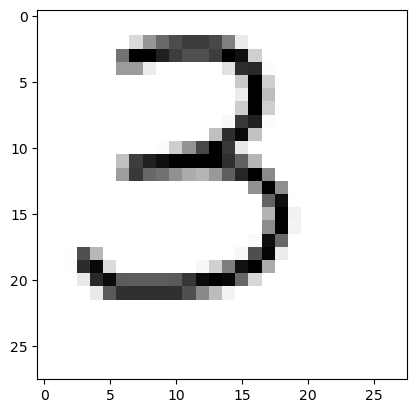

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
digit is 8


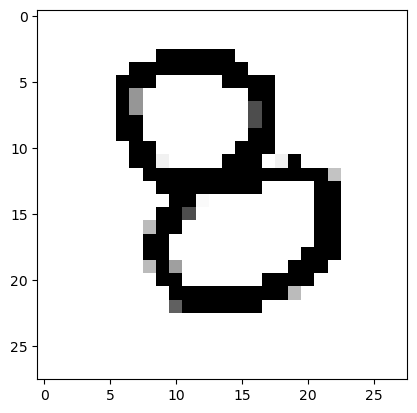

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
digit is 4


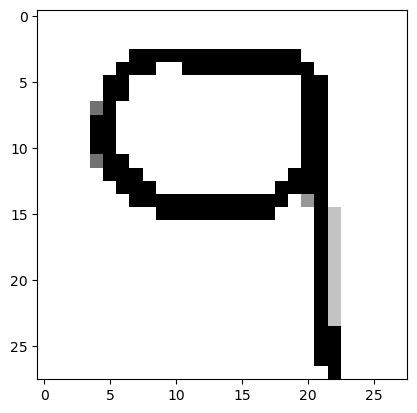

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
digit is 1


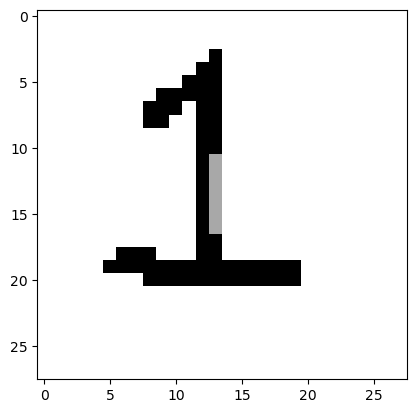

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
digit is 5


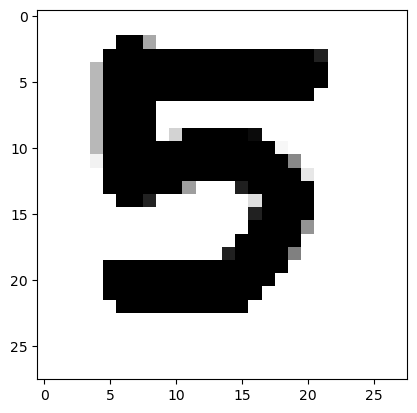

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
digit is 4


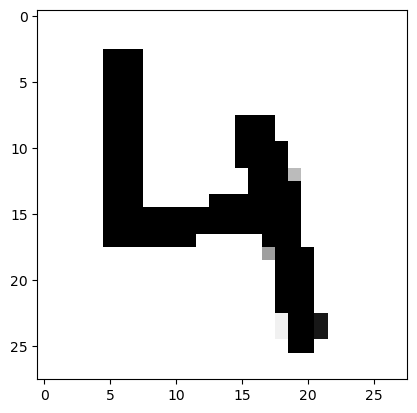

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
digit is 9


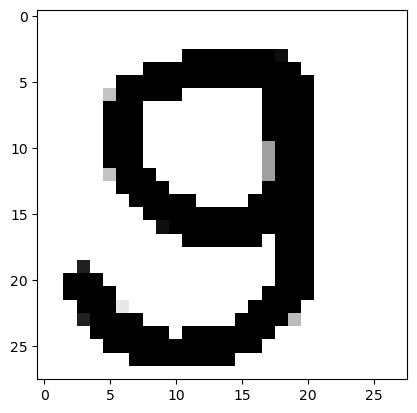

In [ ]:
image_num = 1
while os.path.isfile(f'Digit_Images/digit{image_num}.png'):
    img = cv2.imread(f'Digit_Images/digit{image_num}.png')[:, :, 0]   # Take all black and white pixel data
    img = cv2.resize(img, (28, 28))
    img = np.invert(np.array([img]))                     # Inverting the image data as ANN model expects black in background and data in white
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    print(f"digit is {predicted_digit}")
    plt.imshow(img[0], cmap=plt.cm.binary)               # PLotting image
    plt.show()
    image_num += 1